In [1]:
try:
    get_ipython().run_line_magic("reset", "-f")
    p = display
except NameError:
    p = print

import warnings

warnings.simplefilter("ignore")

import os
from glob import glob
from itertools import combinations
from collections import Counter, defaultdict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import KFold

pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
input_dir = "march-machine-learning-mania-2025"
output_dir = "output"
os.makedirs(output_dir, exist_ok=True)
df_names = []
df_names_with_id = []
df_names_with_season = []

for path in glob(f"../input/{input_dir}/*.csv"):
    df_name = path.split("/")[-1].split(".")[0]
    df_names.append(df_name)

    while df_name not in globals():
        try:
            df = pd.read_csv(path)
            if "ID" in df:
                df_names_with_id.append(df_name)
                df = df.set_index("ID").sort_index()
            if "Season" in df:
                df_names_with_season.append(df_name)
            globals()[df_name] = df

        except UnicodeDecodeError:
            df = pd.read_csv(path, encoding="latin1")
            df.to_csv(path, encoding="utf-8", index=False)

df_names.sort()
df_names_with_id.sort()
df_names_with_season.sort()

# for df_name in df_names:
#     df = globals()[df_name]
#     print(df_name)
#     p(df)
#     pring()

print(", ".join(df_names))
print()
print("ID:", ", ".join(df_names_with_id))
print()
print("Season:", ", ".join(df_names_with_season))

Cities, Conferences, MConferenceTourneyGames, MGameCities, MMasseyOrdinals, MNCAATourneyCompactResults, MNCAATourneyDetailedResults, MNCAATourneySeedRoundSlots, MNCAATourneySeeds, MNCAATourneySlots, MRegularSeasonCompactResults, MRegularSeasonDetailedResults, MSeasons, MSecondaryTourneyCompactResults, MSecondaryTourneyTeams, MTeamCoaches, MTeamConferences, MTeamSpellings, MTeams, SampleSubmissionStage1, SampleSubmissionStage2, SeedBenchmarkStage1, WConferenceTourneyGames, WGameCities, WNCAATourneyCompactResults, WNCAATourneyDetailedResults, WNCAATourneySeeds, WNCAATourneySlots, WRegularSeasonCompactResults, WRegularSeasonDetailedResults, WSeasons, WSecondaryTourneyCompactResults, WSecondaryTourneyTeams, WTeamConferences, WTeamSpellings, WTeams

ID: SampleSubmissionStage1, SampleSubmissionStage2, SeedBenchmarkStage1

Season: MConferenceTourneyGames, MGameCities, MMasseyOrdinals, MNCAATourneyCompactResults, MNCAATourneyDetailedResults, MNCAATourneySeeds, MNCAATourneySlots, MRegularSeason

In [2]:
print("SampleSubmissionStage1")
p(SampleSubmissionStage1)
print()
print("SeedBenchmarkStage1")
p(SeedBenchmarkStage1)
print()
print("SampleSubmissionStage2")
p(SampleSubmissionStage2)
print()
print("MTeams")
p(MTeams)
print()
print("WTeams")
p(WTeams)
print()
print("MTeamConferences")
p(MTeamConferences)
print()
print("WTeamConferences")
p(WTeamConferences)
print()

SampleSubmissionStage1


,Pred
ID,
2021_1101_1102,0.5
2021_1101_1103,0.5
2021_1101_1104,0.5
2021_1101_1105,0.5
2021_1101_1106,0.5
...,...
2024_3475_3477,0.5
2024_3475_3478,0.5
2024_3476_3477,0.5



SeedBenchmarkStage1


,Pred
ID,
2021_1101_1102,0.50
2021_1101_1103,0.50
2021_1101_1104,0.14
2021_1101_1105,0.50
2021_1101_1106,0.50
...,...
2024_3475_3477,0.50
2024_3475_3478,0.50
2024_3476_3477,0.50



SampleSubmissionStage2


,Pred
ID,
2025_1101_1102,0.5
2025_1101_1103,0.5
2025_1101_1104,0.5
2025_1101_1105,0.5
2025_1101_1106,0.5
...,...
2025_3477_3479,0.5
2025_3477_3480,0.5
2025_3478_3479,0.5



MTeams


,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2025
1,1102,Air Force,1985,2025
2,1103,Akron,1985,2025
3,1104,Alabama,1985,2025
4,1105,Alabama A&M,2000,2025
...,...,...,...,...
375,1476,Stonehill,2023,2025
376,1477,East Texas A&M,2023,2025
377,1478,Le Moyne,2024,2025
378,1479,Mercyhurst,2025,2025



WTeams


,TeamID,TeamName
0,3101,Abilene Chr
1,3102,Air Force
2,3103,Akron
3,3104,Alabama
4,3105,Alabama A&M
...,...,...
373,3476,Stonehill
374,3477,East Texas A&M
375,3478,Le Moyne
376,3479,Mercyhurst



MTeamConferences


,Season,TeamID,ConfAbbrev
0,1985,1102,wac
1,1985,1103,ovc
2,1985,1104,sec
3,1985,1106,swac
4,1985,1108,swac
...,...,...,...
13383,2025,1476,nec
13384,2025,1477,southland
13385,2025,1478,nec
13386,2025,1479,nec



WTeamConferences


,Season,TeamID,ConfAbbrev
0,1998,3102,wac
1,1998,3103,mac
2,1998,3104,sec
3,1998,3106,swac
4,1998,3108,swac
...,...,...,...
9485,2025,3476,nec
9486,2025,3477,southland
9487,2025,3478,nec
9488,2025,3479,nec


In [3]:
path = f"{output_dir}/SubmissionIDAll.csv"

if glob(path):
    sub = pd.read_csv(path).set_index("ID")

else:
    sub = pd.DataFrame()

    for tc in [MTeamConferences, WTeamConferences]:
        for season in range(tc["Season"].min(), tc["Season"].max() + 1):
            tc_season = tc[tc["Season"] == season]
            assert tc_season.shape[0] == tc_season["TeamID"].nunique()
            sub_season = pd.DataFrame(
                [
                    (f"{season}_{t1}_{t2}", season, t1, t2)
                    for t1, t2 in combinations(tc_season["TeamID"], 2)
                ],
                columns=["ID", "Season", "TeamID1", "TeamID2"],
            )
            sub_season = pd.merge(
                sub_season,
                tc_season,
                left_on="TeamID1",
                right_on="TeamID",
                suffixes=("", "_1"),
            )
            sub_season = pd.merge(
                sub_season,
                tc_season,
                left_on="TeamID2",
                right_on="TeamID",
                suffixes=("", "_2"),
            )
            sub_season = sub_season.rename(
                columns={"TeamID": "TeamID_1", "ConfAbbrev": "ConfAbbrev_1"}
            )
            sub_season = sub_season.drop(
                columns=["TeamID1", "TeamID2", "Season_1", "Season_2"]
            )
            sub = pd.concat([sub, sub_season])

    sub = sub.set_index("ID").sort_index()
    sub.to_csv(path)
print("SubmissionIDAll (sub)")
p(sub)
print()

SubmissionIDAll (sub)


,Season,TeamID_1,ConfAbbrev_1,TeamID_2,ConfAbbrev_2
ID,,,,,
1985_1102_1103,1985,1102,wac,1103,ovc
1985_1102_1104,1985,1102,wac,1104,sec
1985_1102_1106,1985,1102,wac,1106,swac
1985_1102_1108,1985,1102,wac,1108,swac
1985_1102_1109,1985,1102,wac,1109,ind
...,...,...,...,...,...
2025_3477_3479,2025,3477,southland,3479,nec
2025_3477_3480,2025,3477,southland,3480,a_sun
2025_3478_3479,2025,3478,nec,3479,nec


In [4]:
path = f"{output_dir}/SubmissionStage1.csv"

if glob(path):
    SubmissionStage1 = pd.read_csv(path).set_index("ID")

else:
    SubmissionStage1 = sub[(sub["Season"] > 2020) & (sub["Season"] < 2025)]
    SubmissionStage1["Pred"] = 0.5
    SubmissionStage1 = SubmissionStage1[["Pred"]]
    SubmissionStage1.to_csv(path)

assert all(SampleSubmissionStage1 == SubmissionStage1)
print("SubmissionStage1")
p(SubmissionStage1)
print()

SubmissionStage1


,Pred
ID,
2021_1101_1102,0.5
2021_1101_1103,0.5
2021_1101_1104,0.5
2021_1101_1105,0.5
2021_1101_1106,0.5
...,...
2024_3475_3477,0.5
2024_3475_3478,0.5
2024_3476_3477,0.5


In [5]:
for gender in ["M", "W"]:
    for result_type in ["RegularSeason", "NCAATourney", "SecondaryTourney"]:
        df_name = gender + result_type + "CompactResults"
        print(df_name)
        p(globals()[df_name])
        print()

MRegularSeasonCompactResults


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0
...,...,...,...,...,...,...,...,...
191791,2025,106,1461,69,1102,62,H,0
191792,2025,106,1462,76,1139,63,H,0
191793,2025,106,1466,80,1480,62,H,0
191794,2025,106,1468,94,1122,68,H,0



MNCAATourneyCompactResults


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0
3,1985,136,1229,58,1425,55,N,0
4,1985,136,1242,49,1325,38,N,0
...,...,...,...,...,...,...,...,...
2513,2024,146,1301,76,1181,64,N,0
2514,2024,146,1345,72,1397,66,N,0
2515,2024,152,1163,86,1104,72,N,0
2516,2024,152,1345,63,1301,50,N,0



MSecondaryTourneyCompactResults


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,SecondaryTourney
0,1985,136,1151,67,1155,65,H,0,NIT
1,1985,136,1153,77,1245,61,H,0,NIT
2,1985,136,1201,79,1365,76,H,0,NIT
3,1985,136,1231,79,1139,57,H,0,NIT
4,1985,136,1249,78,1222,71,H,0,NIT
...,...,...,...,...,...,...,...,...,...
1804,2024,142,1371,91,1424,68,H,0,NIT
1805,2024,142,1428,74,1433,54,H,0,NIT
1806,2024,148,1232,100,1428,90,N,0,NIT
1807,2024,148,1371,84,1208,67,N,0,NIT



WRegularSeasonCompactResults


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1998,18,3104,91,3202,41,H,0
1,1998,18,3163,87,3221,76,H,0
2,1998,18,3222,66,3261,59,H,0
3,1998,18,3307,69,3365,62,H,0
4,1998,18,3349,115,3411,35,H,0
...,...,...,...,...,...,...,...,...
135943,2025,106,3242,63,3416,58,H,0
135944,2025,106,3329,68,3428,64,A,0
135945,2025,106,3349,72,3194,39,H,0
135946,2025,106,3378,70,3150,52,A,0



WNCAATourneyCompactResults


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1998,137,3104,94,3422,46,H,0
1,1998,137,3112,75,3365,63,H,0
2,1998,137,3163,93,3193,52,H,0
3,1998,137,3198,59,3266,45,H,0
4,1998,137,3203,74,3208,72,A,0
...,...,...,...,...,...,...,...,...
1645,2024,147,3163,80,3425,73,A,0
1646,2024,147,3234,94,3261,87,H,0
1647,2024,151,3234,71,3163,69,N,0
1648,2024,151,3376,78,3301,59,N,0



WSecondaryTourneyCompactResults


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,SecondaryTourney
0,2013,135,3120,80,3412,57,H,0,WNIT
1,2013,135,3140,69,3226,54,H,0,WNIT
2,2013,135,3158,72,3297,70,A,0,WBI
3,2013,135,3183,60,3281,58,A,0,WNIT
4,2013,135,3189,68,3184,61,H,0,WBI
...,...,...,...,...,...,...,...,...,...
823,2024,147,3437,58,3336,53,H,0,WBIT
824,2024,149,3228,71,3437,57,A,0,WBIT
825,2024,149,3278,74,3407,69,A,0,WNIT
826,2024,149,3387,57,3436,54,A,0,WNIT


In [6]:
def wl_to_12(results, col):
    dtype = results[f"W{col}"].dtype
    mask = results["WTeamID"] < results["LTeamID"]
    results.loc[mask, f"{col}_1"] = results.loc[mask, f"W{col}"]
    results.loc[mask, f"{col}_2"] = results.loc[mask, f"L{col}"]
    results.loc[~mask, f"{col}_1"] = results.loc[~mask, f"L{col}"]
    results.loc[~mask, f"{col}_2"] = results.loc[~mask, f"W{col}"]
    results[f"{col}_1"] = results[f"{col}_1"].astype(dtype)
    results[f"{col}_2"] = results[f"{col}_2"].astype(dtype)
    return results, mask


def process_results(results):
    results, mask = wl_to_12(results, "TeamID")
    results["ID"] = (
        results["Season"].astype(str)
        + "_"
        + results["TeamID_1"].astype(str)
        + "_"
        + results["TeamID_2"].astype(str)
    )
    results["index"] = results["ID"] + "_" + results["DayNum"].astype(str)
    return results, mask

In [7]:
Y_all = pd.DataFrame()

for gender in ["M", "W"]:
    for part in ["RegularSeason", "NCAATourney", "SecondaryTourney"]:
        results = globals()[gender + part + "CompactResults"].copy()
        results, mask = process_results(results)
        results["Part"] = part
        results["y_true"] = mask.astype(int)
        results = results[
            [
                "index",
                "ID",
                "DayNum",
                "Season",
                "Part",
                "TeamID_1",
                "TeamID_2",
                "WTeamID",
                "LTeamID",
                "y_true",
            ]
        ]
        Y_all = pd.concat([Y_all, results])

assert Y_all["index"].nunique() == Y_all.shape[0]
Y_all = Y_all.set_index("index").sort_index()
print("Y_all")
p(Y_all)
print()

Y_all


,ID,DayNum,Season,Part,TeamID_1,TeamID_2,WTeamID,LTeamID,y_true
index,,,,,,,,,
1985_1102_1109_40,1985_1102_1109,40,1985,RegularSeason,1102,1109,1102,1109,1
1985_1102_1135_62,1985_1102_1135,62,1985,RegularSeason,1102,1135,1135,1102,0
1985_1102_1140_110,1985_1102_1140,110,1985,RegularSeason,1102,1140,1140,1102,0
1985_1102_1140_126,1985_1102_1140,126,1985,RegularSeason,1102,1140,1102,1140,1
1985_1102_1140_80,1985_1102_1140,80,1985,RegularSeason,1102,1140,1140,1102,0
...,...,...,...,...,...,...,...,...,...
2025_3476_3478_77,2025_3476_3478,77,2025,RegularSeason,3476,3478,3478,3476,0
2025_3476_3479_103,2025_3476_3479,103,2025,RegularSeason,3476,3479,3476,3479,1
2025_3476_3479_59,2025_3476_3479,59,2025,RegularSeason,3476,3479,3476,3479,1


In [8]:
p(MRegularSeasonDetailedResults)
p(WRegularSeasonDetailedResults)

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,3,14,11,18,14,24,13,23,7,1,22,22,53,2,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,8,20,10,19,15,28,16,13,4,4,18,24,67,6,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,8,18,17,29,17,26,15,10,5,2,25,22,73,3,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,3,9,17,31,6,19,11,12,14,2,18,18,49,6,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,6,14,11,13,17,22,12,14,4,4,20,24,62,6,16,17,27,21,15,12,10,7,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117743,2025,106,1461,69,1102,62,H,0,25,54,6,17,13,22,9,27,11,9,3,3,18,23,49,7,23,9,17,2,24,12,8,3,3,24
117744,2025,106,1462,76,1139,63,H,0,29,68,8,25,10,11,4,29,21,9,14,3,15,24,55,6,23,9,14,4,31,12,20,5,2,12
117745,2025,106,1466,80,1480,62,H,0,28,55,2,13,22,29,5,30,11,5,10,2,12,27,61,4,18,4,8,6,23,13,13,2,2,18
117746,2025,106,1468,94,1122,68,H,0,36,58,10,19,12,17,2,27,19,6,4,2,16,20,59,11,32,17,22,7,22,12,10,2,5,17


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2010,11,3103,63,3237,49,H,0,23,54,5,9,12,19,10,26,14,18,7,0,15,20,54,3,13,6,10,11,27,11,23,7,6,19
1,2010,11,3104,73,3399,68,N,0,26,62,5,12,16,28,16,31,15,20,5,2,25,25,63,4,21,14,27,14,26,7,20,4,2,27
2,2010,11,3110,71,3224,59,A,0,29,62,6,15,7,12,14,23,18,13,6,2,17,19,58,2,14,19,23,17,23,8,15,6,0,15
3,2010,11,3111,63,3267,58,A,0,27,52,4,11,5,9,6,40,14,27,5,10,18,18,74,6,26,16,25,22,22,15,11,14,5,14
4,2010,11,3119,74,3447,70,H,1,30,74,7,20,7,11,14,33,18,11,5,3,18,25,74,9,17,11,21,21,32,12,14,4,2,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80621,2025,106,3242,63,3416,58,H,0,17,46,4,17,25,28,5,26,9,12,4,5,16,23,63,7,26,5,11,15,21,11,12,4,2,21
80622,2025,106,3329,68,3428,64,A,0,23,63,6,23,16,18,18,25,9,17,6,3,21,25,58,5,23,9,16,8,18,16,11,8,6,20
80623,2025,106,3349,72,3194,39,H,0,30,63,10,24,2,4,5,39,21,10,6,5,14,10,55,3,17,16,23,4,25,5,10,4,3,9
80624,2025,106,3378,70,3150,52,A,0,25,59,4,17,16,18,8,30,15,12,9,3,16,18,58,5,17,11,14,7,24,5,15,8,2,15


In [9]:
GameStatsByID = pd.DataFrame()
cols_info = [
    "index",
    "ID",
    "Season",
    "TeamID_1",
    "TeamID_2",
    "DayNum",
    "NumOT",
    "Loc_1",
    "Loc_2",
]
cols_stats = [
    "Score",
    "FGM",
    "FGA",
    "FGM3",
    "FGA3",
    "FTM",
    "FTA",
    "OR",
    "DR",
    "Ast",
    "TO",
    "Stl",
    "Blk",
    "PF",
]

for gender in ["M", "W"]:
    results = globals()[gender + "RegularSeasonDetailedResults"].copy()
    results, mask = process_results(results)

    for col in cols_stats:
        results, _ = wl_to_12(results, col)

    results["WLoc"] = results["WLoc"].astype("category")
    assert sorted(results["WLoc"].cat.categories.to_list()) == ["A", "H", "N"]
    results["LLoc"] = results["WLoc"].cat.rename_categories({"A": "H", "H": "A"})
    results, _ = wl_to_12(results, "Loc")
    cols = cols_info.copy()

    for col in cols_stats:
        for team in [1, 2]:
            cols.append(f"{col}_{team}")

    results = results[cols]
    GameStatsByID = pd.concat([GameStatsByID, results])

assert GameStatsByID["index"].nunique() == GameStatsByID.shape[0]
GameStatsByID = GameStatsByID.set_index("index").sort_index()
print("GameStatsByID")
p(GameStatsByID)
print()

GameStatsByID


,ID,Season,TeamID_1,TeamID_2,DayNum,NumOT,Loc_1,Loc_2,Score_1,Score_2,FGM_1,FGM_2,FGA_1,FGA_2,FGM3_1,FGM3_2,FGA3_1,FGA3_2,FTM_1,FTM_2,FTA_1,FTA_2,OR_1,OR_2,DR_1,DR_2,Ast_1,Ast_2,TO_1,TO_2,Stl_1,Stl_2,Blk_1,Blk_2,PF_1,PF_2
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2003_1102_1117_25,2003_1102_1117,2003,1102,1117,25,0,A,H,57,52,16,16,36,43,7,6,20,14,18,14,22,21,3,7,24,17,10,8,10,8,5,3,3,0,20,19
2003_1102_1125_37,2003_1102_1125,2003,1102,1125,37,0,H,A,85,76,26,24,41,49,12,12,23,27,21,16,32,17,4,13,12,19,21,12,5,14,5,2,1,0,19,25
2003_1102_1140_117,2003_1102_1140,2003,1102,1140,117,0,H,A,43,56,14,19,36,34,4,2,20,10,11,16,20,22,4,5,15,24,8,6,14,14,5,9,1,1,19,18
2003_1102_1140_91,2003_1102_1140,2003,1102,1140,91,0,A,H,33,65,11,21,51,45,5,8,33,14,6,15,10,23,6,17,15,38,7,16,9,16,7,4,2,3,22,15
2003_1102_1161_103,2003_1102_1161,2003,1102,1161,103,0,H,A,80,75,23,29,32,49,7,10,12,18,27,7,34,10,0,11,11,13,13,12,15,18,13,8,1,4,15,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025_3476_3478_77,2025_3476_3478,2025,3476,3478,77,0,A,H,67,69,27,23,60,50,9,7,26,20,4,16,5,20,11,9,19,20,19,11,14,16,4,5,1,2,19,14
2025_3476_3479_103,2025_3476_3479,2025,3476,3479,103,0,A,H,69,62,24,25,55,71,9,5,22,32,12,7,16,10,6,11,28,22,13,9,20,18,6,12,2,0,18,15
2025_3476_3479_59,2025_3476_3479,2025,3476,3479,59,0,H,A,72,54,26,21,56,56,7,4,18,19,13,8,15,10,8,2,29,22,17,9,19,16,11,6,2,1,19,17


In [10]:
for part in ["RegularSeason", "NCAATourney", "SecondaryTourney"]:
    print(
        f"{part:>16} {Y_all[(Y_all['Season']>2002) & (Y_all['Part']==part)].shape[0]:>6}"
    )

print(f"{' '*16} {Y_all[Y_all['Season']>2002].shape[0]:>6}")

   RegularSeason 232307
     NCAATourney   2717
SecondaryTourney   2053
                 237077


In [11]:
df = GameStatsByID.reset_index().rename(columns={"index": "GameStatsByID_index"})
cols_single = ["GameStatsByID_index", "ID", "DayNum", "Season", "NumOT"]
cols_double = [
    "TeamID",
    "Loc",
    "Score",
    "FGM",
    "FGA",
    "FGM3",
    "FGA3",
    "FTM",
    "FTA",
    "OR",
    "DR",
    "Ast",
    "TO",
    "Stl",
    "Blk",
    "PF",
]
GameStatsByTeam = pd.DataFrame(
    {c: df[[f"{c}_1", f"{c}_2"]].values.flatten() for c in cols_double}
)

for col in cols_single:
    GameStatsByTeam[col] = np.repeat(df[col].values, 2)

GameStatsByTeam["index"] = (
    GameStatsByTeam["GameStatsByID_index"] + "_" + np.tile(["1", "2"], len(df))
)

GameStatsByTeam = GameStatsByTeam[
    ["index"] + cols_single[:-1] + ["TeamID", "NumOT"] + cols_double[1:]
]
paired_indices = np.tile([1, 0], len(df))
game_indices = np.repeat(np.arange(len(df)), 2)

for col in cols_double[1:]:  # Skip TeamID
    GameStatsByTeam[f"{col}_o"] = GameStatsByTeam[col].values[
        game_indices * 2 + paired_indices
    ]

GameStatsByTeam = GameStatsByTeam.set_index("index").sort_index()
print("GameStatsByTeam")
p(GameStatsByTeam)
print()

GameStatsByTeam


,GameStatsByID_index,ID,DayNum,Season,TeamID,NumOT,Loc,Score,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF,Loc_o,Score_o,FGM_o,FGA_o,FGM3_o,FGA3_o,FTM_o,FTA_o,OR_o,DR_o,Ast_o,TO_o,Stl_o,Blk_o,PF_o
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2003_1102_1117_25_1,2003_1102_1117_25,2003_1102_1117,25,2003,1102,0,A,57,16,36,7,20,18,22,3,24,10,10,5,3,20,H,52,16,43,6,14,14,21,7,17,8,8,3,0,19
2003_1102_1117_25_2,2003_1102_1117_25,2003_1102_1117,25,2003,1117,0,H,52,16,43,6,14,14,21,7,17,8,8,3,0,19,A,57,16,36,7,20,18,22,3,24,10,10,5,3,20
2003_1102_1125_37_1,2003_1102_1125_37,2003_1102_1125,37,2003,1102,0,H,85,26,41,12,23,21,32,4,12,21,5,5,1,19,A,76,24,49,12,27,16,17,13,19,12,14,2,0,25
2003_1102_1125_37_2,2003_1102_1125_37,2003_1102_1125,37,2003,1125,0,A,76,24,49,12,27,16,17,13,19,12,14,2,0,25,H,85,26,41,12,23,21,32,4,12,21,5,5,1,19
2003_1102_1140_117_1,2003_1102_1140_117,2003_1102_1140,117,2003,1102,0,H,43,14,36,4,20,11,20,4,15,8,14,5,1,19,A,56,19,34,2,10,16,22,5,24,6,14,9,1,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025_3476_3479_59_2,2025_3476_3479_59,2025_3476_3479,59,2025,3479,0,A,54,21,56,4,19,8,10,2,22,9,16,6,1,17,H,72,26,56,7,18,13,15,8,29,17,19,11,2,19
2025_3478_3479_66_1,2025_3478_3479_66,2025_3478_3479,66,2025,3478,0,A,52,16,44,5,16,15,23,6,25,6,22,10,1,14,H,63,23,58,10,30,7,9,7,24,12,16,10,0,18
2025_3478_3479_66_2,2025_3478_3479_66,2025_3478_3479,66,2025,3479,0,H,63,23,58,10,30,7,9,7,24,12,16,10,0,18,A,52,16,44,5,16,15,23,6,25,6,22,10,1,14


In [12]:
df = GameStatsByTeam.reset_index().rename(columns={"index": "GameStatsByTeam_index"})
groupby = ["Season", "TeamID"]
mean = [
    "NumOT",
    "Score",
    "FGM",
    "FGA",
    "FGM3",
    "FGA3",
    "FTM",
    "FTA",
    "OR",
    "DR",
    "Ast",
    "TO",
    "Stl",
    "Blk",
    "PF",
    "Score_o",
    "FGM_o",
    "FGA_o",
    "FGM3_o",
    "FGA3_o",
    "FTM_o",
    "FTA_o",
    "OR_o",
    "DR_o",
    "Ast_o",
    "TO_o",
    "Stl_o",
    "Blk_o",
    "PF_o",
]

SeasonStats = pd.concat(
    [
        pd.crosstab(
            [df["Season"], df["TeamID"]],
            [df["Loc"]],
            normalize="index",
        ),
        df.groupby(groupby)[mean].mean(),
    ],
    axis=1,
)

SeasonStats.sort_index()
print("SeasonStats")
p(SeasonStats)
print()

SeasonStats


A         H         N     NumOT      Score        FGM        FGA      FGM3       FGA3        FTM        FTA         OR         DR        Ast         TO       Stl       Blk         PF    Score_o      FGM_o      FGA_o    FGM3_o     FGA3_o      FTM_o      FTA_o       OR_o       DR_o      Ast_o       TO_o     Stl_o     Blk_o       PF_o
Season TeamID                                                                                                                                                                                                                                                                                                                                                      
2003   1102    0.464286  0.464286  0.071429  0.000000  57.250000  19.142857  39.785714  7.821429  20.821429  11.142857  17.107143   4.178571  16.821429  13.000000  11.428571  5.964286  1.785714  18.750000  57.000000  19.285714  42.428571  4.750000  12.428571  13.678571  19.250000   9.607143  20.142857   9.142857  12.964286  5.428571  1.571429  18.357143
       1103    0.481481  0.518519  0.000000  0.296296  78.777778  27.148148  55.851852  5.444444  16.074074  19.037037  25.851852   9.777778  19.925926  15.222222  12.629630  7.259259  2.333333  19.851852  78.148148  27.777778  57.000000  6.666667  18.370370  15.925926  22.148148  12.037037  22.037037  15.481481  15.333333  6.407407  2.851852  22.444444
       1104    0.321429  0.535714  0.142857  0.035714  69.285714  24.035714  57.178571  6.357143  19.857143  14.857143  20.928571  13.571429  23.928571  12.107143  13.285714  6.607143  3.785714  18.035714  65.000000  23.250000  55.500000  6.357143  19.142857  12.142857  17.142857  10.892857  22.642857  11.678571  13.857143  5.535714  3.178571  19.250000
       1105    0.538462  0.461538  0.000000  0.153846  71.769231  24.384615  61.615385  7.576923  20.769231  15.423077  21.846154  13.500000  23.115385  14.538462  18.653846  9.307692  2.076923  20.230769  76.653846  27.000000  58.961538  6.269231  17.538462  16.384615  24.500000  13.192308  26.384615  15.807692  18.807692  9.384615  4.192308  19.076923
       1106    0.500000  0.428571  0.071429  0.035714  63.607143  23.428571  55.285714  6.107143  17.642857  10.642857  16.464286  12.285714  23.857143  11.678571  17.035714  8.357143  3.142857  18.178571  63.750000  21.714286  53.392857  4.785714  15.214286  15.535714  21.964286  11.321429  22.357143  11.785714  15.071429  8.785714  3.178571  16.142857
...                 ...       ...       ...       ...        ...        ...        ...       ...        ...        ...        ...        ...        ...        ...        ...       ...       ...        ...        ...        ...        ...       ...        ...        ...        ...        ...        ...        ...        ...       ...       ...        ...
2025   3476    0.608696  0.391304  0.000000  0.086957  63.608696  23.913043  58.608696  7.043478  21.304348   8.739130  10.956522   9.043478  23.695652  16.391304  16.391304  4.565217  2.695652  14.869565  67.869565  25.565217  59.956522  6.652174  20.000000  10.086957  14.347826   8.956522  22.000000  13.000000  13.260870  9.521739  3.304348  15.478261
       3477    0.545455  0.409091  0.045455  0.090909  61.954545  22.818182  60.681818  6.772727  21.409091   9.545455  13.045455   7.318182  22.590909  12.954545  15.181818  6.363636  3.045455  17.227273  72.772727  27.454545  62.954545  6.045455  19.000000  11.818182  17.818182  10.954545  27.590909  14.454545  13.818182  7.863636  3.045455  13.681818
       3478    0.500000  0.416667  0.083333  0.083333  52.250000  17.416667  50.875000  6.333333  20.916667  11.083333  14.666667   6.875000  21.958333   9.916667  17.208333  4.958333  1.750000  14.500000  71.500000  26.916667  60.833333  8.541667  24.541667   9.125000  12.333333   9.541667  24.083333  17.541667  11.791667  8.500000  2.333333  16.000000
       3479    0.619048  0.380952  0.000000  0.142857  62.380952  21.476190  52.904762  6.714286  21.00000

In [13]:
s = GameStatsByTeam.loc[
    (GameStatsByTeam["Season"] == 2003) & (GameStatsByTeam["TeamID"] == 1103), "NumOT"
]
print(sorted(s.to_list()))
print(s.sum(), s.count(), f"{s.mean():.4f}")

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 4]
8 27 0.2963


In [14]:
min_year_women_detailed = SeasonStats[
    SeasonStats.index.get_level_values("TeamID") > 2999
].index.min()[0]
print(min_year_women_detailed)
cols_shared = ["Season", "ID", "DayNum", "Part", "y_true"]
Y_teams = []

for suffix in ["1", "2"]:
    Y_team = Y_all.rename(columns={f"TeamID_{suffix}": "TeamID"})
    Y_team = Y_team[Y_team["Season"] >= min_year_women_detailed]
    Y_team = Y_team.reset_index().set_index(["Season", "TeamID"]).sort_index()

    if suffix == "1":
        print(
            f"{'Y_team':>11} {Y_team.shape} {Y_team[Y_team.index.get_level_values('TeamID')>2999].index.min()}"
        )
        print(
            f"SeasonStats {str(SeasonStats.shape):>11} {SeasonStats[SeasonStats.index.get_level_values('TeamID')>2999].index.min()}"
        )

    Y_team = Y_team.join(SeasonStats).reset_index()
    Y_team = Y_team.set_index("index").sort_index()
    Y_team = Y_team.drop(columns=["WTeamID", "LTeamID"])

    if suffix == "1":
        Y_team = Y_team.drop(columns=["TeamID_2"])
    else:
        Y_team = Y_team.drop(columns=["TeamID_1"] + cols_shared)

    Y_team = Y_team.rename(
        columns={col: f"{col}_{suffix}" for col in Y_team if col not in cols_shared}
    )
    Y_teams.append(Y_team)

train = pd.concat([Y_teams[0], Y_teams[1]], axis=1)
train = train[
    cols_shared
    + ["TeamID_1", "TeamID_2"]
    + [
        c
        for c in train
        if not c.startswith("TeamID_") and (c.endswith("_1") or c.endswith("_2"))
    ]
]
print("train")
p(train)
print()

2010
     Y_team (168103, 8) (2010, 3102)
SeasonStats (13583, 32) (2010, 3102)
train


,Season,ID,DayNum,Part,y_true,TeamID_1,TeamID_2,A_1,H_1,N_1,NumOT_1,Score_1,FGM_1,FGA_1,FGM3_1,FGA3_1,FTM_1,FTA_1,OR_1,DR_1,Ast_1,TO_1,Stl_1,Blk_1,PF_1,Score_o_1,FGM_o_1,FGA_o_1,FGM3_o_1,FGA3_o_1,FTM_o_1,FTA_o_1,OR_o_1,DR_o_1,Ast_o_1,TO_o_1,Stl_o_1,Blk_o_1,PF_o_1,A_2,H_2,N_2,NumOT_2,Score_2,FGM_2,FGA_2,FGM3_2,FGA3_2,FTM_2,FTA_2,OR_2,DR_2,Ast_2,TO_2,Stl_2,Blk_2,PF_2,Score_o_2,FGM_o_2,FGA_o_2,FGM3_o_2,FGA3_o_2,FTM_o_2,FTA_o_2,OR_o_2,DR_o_2,Ast_o_2,TO_o_2,Stl_o_2,Blk_o_2,PF_o_2
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010_1102_1140_103,2010,2010_1102_1140,103,RegularSeason,0,1102,1140,0.344828,0.517241,0.137931,0.000000,55.620690,20.000000,45.586207,5.620690,18.103448,10.000000,15.689655,6.758621,19.862069,12.275862,12.793103,4.827586,1.517241,17.551724,62.965517,21.448276,47.103448,7.206897,20.827586,12.862069,18.827586,8.862069,22.206897,13.000000,11.655172,5.931034,2.931034,16.034483,0.424242,0.454545,0.121212,0.000000,82.606061,28.393939,58.909091,8.121212,19.545455,17.696970,22.515152,10.181818,26.787879,15.787879,11.303030,8.545455,3.484848,17.363636,65.666667,23.000000,56.060606,5.909091,17.606061,13.757576,20.393939,9.909091,22.636364,12.393939,15.606061,5.818182,2.878788,18.363636
2010_1102_1140_72,2010,2010_1102_1140,72,RegularSeason,0,1102,1140,0.344828,0.517241,0.137931,0.000000,55.620690,20.000000,45.586207,5.620690,18.103448,10.000000,15.689655,6.758621,19.862069,12.275862,12.793103,4.827586,1.517241,17.551724,62.965517,21.448276,47.103448,7.206897,20.827586,12.862069,18.827586,8.862069,22.206897,13.000000,11.655172,5.931034,2.931034,16.034483,0.424242,0.454545,0.121212,0.000000,82.606061,28.393939,58.909091,8.121212,19.545455,17.696970,22.515152,10.181818,26.787879,15.787879,11.303030,8.545455,3.484848,17.363636,65.666667,23.000000,56.060606,5.909091,17.606061,13.757576,20.393939,9.909091,22.636364,12.393939,15.606061,5.818182,2.878788,18.363636
2010_1102_1149_26,2010,2010_1102_1149,26,RegularSeason,1,1102,1149,0.344828,0.517241,0.137931,0.000000,55.620690,20.000000,45.586207,5.620690,18.103448,10.000000,15.689655,6.758621,19.862069,12.275862,12.793103,4.827586,1.517241,17.551724,62.965517,21.448276,47.103448,7.206897,20.827586,12.862069,18.827586,8.862069,22.206897,13.000000,11.655172,5.931034,2.931034,16.034483,0.615385,0.384615,0.000000,0.153846,64.307692,23.692308,57.038462,6.076923,17.615385,10.846154,16.384615,12.346154,22.807692,10.076923,14.692308,7.692308,4.038462,18.346154,69.076923,24.538462,55.384615,5.769231,17.538462,14.230769,21.423077,11.961538,24.538462,13.461538,13.807692,7.346154,2.961538,16.346154
2010_1102_1161_68,2010,2010_1102_1161,68,RegularSeason,0,1102,1161,0.344828,0.517241,0.137931,0.000000,55.620690,20.000000,45.586207,5.620690,18.103448,10.000000,15.689655,6.758621,19.862069,12.275862,12.793103,4.827586,1.517241,17.551724,62.965517,21.448276,47.103448,7.206897,20.827586,12.862069,18.827586,8.862069,22.206897,13.000000,11.655172,5.931034,2.931034,16.034483,0.433333,0.466667,0.100000,0.066667,66.033333,21.633333,51.166667,5.433333,15.700000,17.333333,25.200000,11.233333,23.433333,10.466667,14.966667,6.833333,2.433333,20.900000,67.266667,22.033333,50.800000,6.333333,18.100000,16.866667,24.733333,9.500000,22.766667,11.966667,14.233333,6.666667,3.933333,21.066667
2010_1102_1161_99,2010,2010_1102_1161,99,RegularSeason,0,1102,1161,0.344828,0.517241,0.137931,0.000000,55.620690,20.000000,45.586207,5.620690,18.103448,10.000000,15.689655,6.758621,19.862069,12.275862,12.793103,4.827586,1.517241,17.551724,62.965517,21.448276,47.103448,7.206897,20.827586,12.862069,18.827586,8.862069,22.206897,13.000000,11.655172,5.931034,2.931034,16.034483,0.433333,0.466667,0.100000,0.066667,66.033333,21.633333,51.166667,5.433333,15.700000,17.333333,25.200000,11.233333,23.433333,10.466667,14.966667,6.833333,2.433333,20.900000,67.266667,22.033333,50.800000,6.333333,18.100000,16.866667,24.733333,9.500000,22.766667,11.966667,14.233333,6.666667,3.933333,21.066667
...,...,...,...,...,

2010
  0


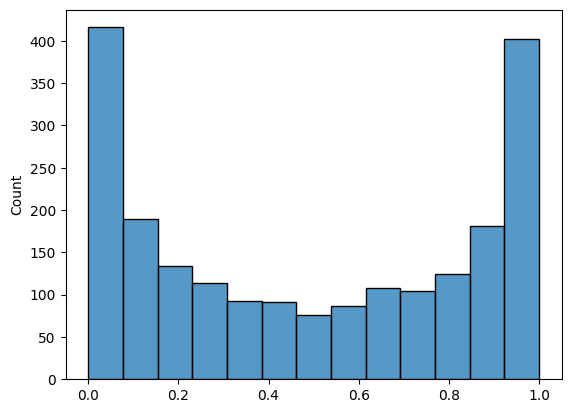

  1
  2
  3
  4

2011
  0
  1
  2
  3
  4

2012
  0
  1
  2
  3
  4

2013
  0
  1
  2
  3
  4

2014
  0
  1
  2
  3
  4

2015
  0
  1
  2
  3
  4

2016
  0
  1
  2
  3
  4

2017
  0
  1
  2
  3
  4

2018
  0
  1
  2
  3
  4

2019
  0
  1
  2
  3
  4

2020
  0
  1
  2
  3
  4

2021
  0
  1
  2
  3
  4

2022
  0
  1
  2
  3
  4

2023
  0
  1
  2
  3
  4

2024
  0
  1
  2
  3
  4

2025
  0
  1
  2
  3
  4



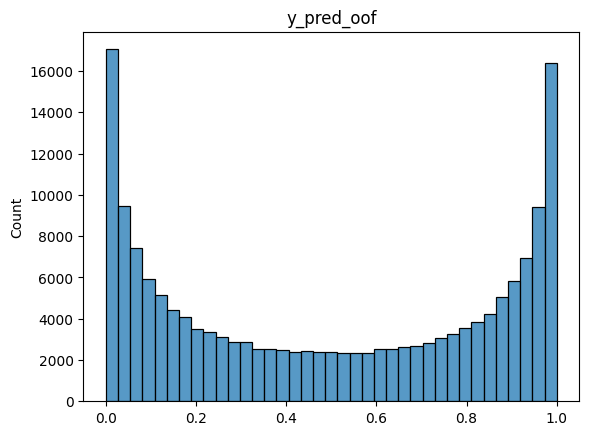

In [46]:
kfold = KFold(shuffle=True, random_state=42)
m = xgb.XGBClassifier(objective="binary:logistic")
y_pred_oof = np.zeros(len(train))

t = train.reset_index()

for season in sorted(t["Season"].unique()):
    print(season)
    t_season = t[t["Season"] == season]
    X = t_season.drop(columns=["index", "Season", "ID", "Part", "y_true"])
    y = t_season["y_true"]
    for fold_n, (i_fold, i_oof) in enumerate(kfold.split(t_season.index)):
        print(f"  {fold_n}")
        m.fit(X.iloc[i_fold], y.iloc[i_fold])
        y_pred = m.predict_proba(X.iloc[i_oof])[:, 1]
        y_pred_oof[t_season.iloc[i_oof].index] = y_pred
        if season == min_year_women_detailed and fold_n == 0:
            sns.histplot(y_pred)
            plt.show()
    print()

sns.histplot(y_pred_oof)
plt.title("y_pred_oof");

Pred
0.549309         1
0.014125         1
0.011891         1
0.621582         1
0.152711         1
             ...  
0.123542         2
0.974531         2
0.986491         2
0.999696         3
0.000000    156817
Name: count, Length: 11274, dtype: int64